<a href="https://colab.research.google.com/github/DerinOgrenme2021/AbdullahZengin/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

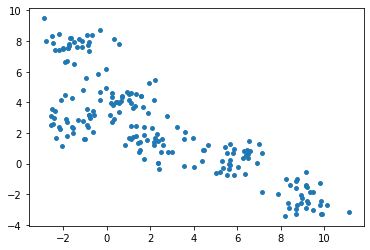

In [120]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=200, centers=6, cluster_std=0.8, random_state=0)

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], s=15)

In [121]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)
y_kmeans 

array([3, 4, 4, 5, 1, 2, 3, 0, 1, 5, 3, 1, 0, 2, 4, 1, 0, 4, 1, 1, 2, 2,
       2, 1, 3, 0, 4, 0, 3, 3, 2, 0, 2, 1, 1, 4, 2, 5, 5, 2, 0, 0, 0, 5,
       1, 4, 1, 1, 2, 3, 2, 3, 5, 0, 3, 4, 0, 2, 1, 5, 2, 0, 3, 1, 5, 0,
       1, 4, 3, 1, 0, 3, 2, 5, 2, 0, 2, 0, 1, 3, 4, 4, 3, 0, 4, 5, 5, 0,
       0, 5, 3, 2, 1, 1, 4, 4, 2, 3, 4, 2, 1, 1, 3, 5, 4, 3, 1, 4, 1, 4,
       3, 0, 5, 3, 2, 3, 4, 3, 0, 5, 0, 0, 3, 1, 4, 5, 5, 1, 4, 3, 2, 5,
       1, 1, 4, 5, 1, 3, 5, 4, 5, 1, 4, 3, 3, 0, 4, 5, 1, 2, 0, 0, 4, 5,
       1, 5, 2, 3, 2, 3, 3, 1, 4, 5, 0, 3, 2, 2, 5, 2, 0, 1, 2, 2, 3, 1,
       5, 5, 4, 0, 0, 2, 4, 2, 2, 0, 0, 5, 0, 4, 5, 1, 5, 1, 4, 2, 3, 0,
       5, 0], dtype=int32)

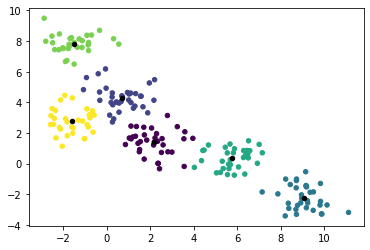

In [122]:
plt.scatter(X[:,0], X[:,1], c = y_kmeans, s = 20)
cent = kmeans.cluster_centers_
plt.scatter(cent[:,0], cent[:,1], c = 'black', s = 20)


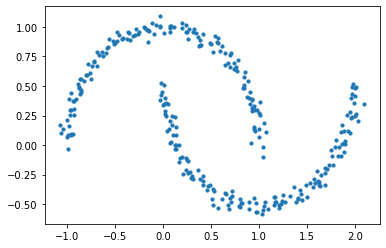

In [123]:
from sklearn.datasets import make_moons

X, y = make_moons(300, noise = 0.04, random_state = 0)

plt.scatter(X[:,0], X[:,1], s = 10)

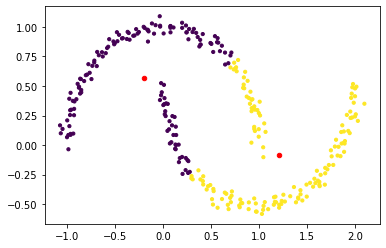

In [124]:
model = KMeans(2, random_state = 0).fit(X)
y_pred = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, s = 10)
cent = model.cluster_centers_
plt.scatter(cent[:,0], cent[:,1], c='red', s = 20)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


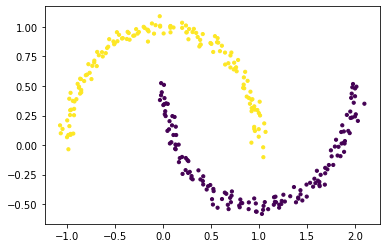

In [125]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')

labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s = 10)

In [126]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
centers = kmeans.cluster_centers_
print(centers.data.shape)

(1797, 64)
(10, 64)


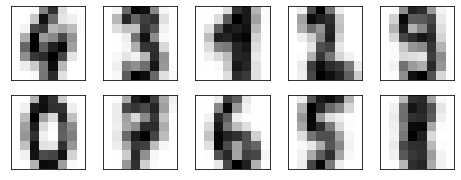

In [127]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = centers.reshape(10,8,8)

for axi, c in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(c, interpolation = "nearest", cmap = plt.cm.binary)
  #break

In [128]:
clusters

array([5, 9, 9, ..., 9, 4, 4], dtype=int32)

In [ ]:
#from sklearn.metrics import accuracy_score

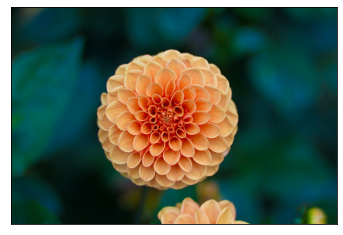

In [129]:
from sklearn.datasets import load_sample_image

flower = load_sample_image("flower.jpg")

ax = plt.axes(xticks = [] ,yticks=[])
ax.imshow(flower)

In [135]:
data = flower / 255.0
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [188]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

new_color=kmeans.cluster_centers_[kmeans.predict(data)]
new_color

array([[0.0256651 , 0.0971923 , 0.06891282],
       [0.0256651 , 0.0971923 , 0.06891282],
       [0.0256651 , 0.0971923 , 0.06891282],
       ...,
       [0.02183723, 0.18353478, 0.11582057],
       [0.02183723, 0.18353478, 0.11582057],
       [0.02183723, 0.18353478, 0.11582057]])

Text(0.5, 1.0, 'Compressed Image')

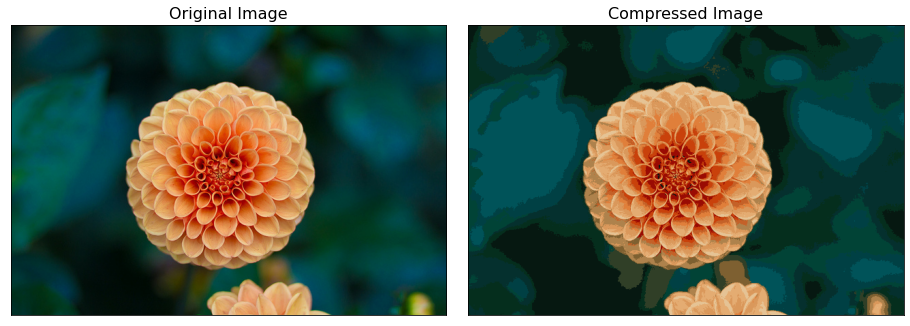

In [189]:
flower_compressed = new_color.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(flower)
ax[0].set_title("Original Image", size = 16)
ax[1].imshow(flower_compressed)
ax[1].set_title("Compressed Image", size = 16) 